# Quantum Computing Fundamentals: Making the Future Accessible

## Learning Objectives

By completing this tutorial, you will:

- Understand fundamental quantum computing concepts (qubits, superposition, entanglement)
- Build and execute quantum circuits using Qiskit
- Implement practical quantum algorithms
- Compare quantum vs classical computing advantages
- Explore real-world quantum applications
- Create your own quantum programs

## Prerequisites

- Basic Python programming
- High school level mathematics
- No prior quantum physics knowledge required

**Tools:** Qiskit quantum computing framework



## Introduction: Why Quantum Computing Matters

Quantum computing represents a fundamental shift in how we process information. While classical computers use bits (0 or 1), quantum computers use qubits that can exist in superposition - being 0 AND 1 simultaneously.

### Quantum Advantage Areas
- **Cryptography**: Breaking and creating unbreakable codes
- **Drug Discovery**: Simulating molecular interactions
- **Optimization**: Solving complex routing and scheduling problems
- **Machine Learning**: Exponential speedup for certain algorithms
- **Financial Modeling**: Risk analysis and portfolio optimization

Major tech companies (IBM, Google, Microsoft) and governments are investing billions in quantum computing, making it a critical technology for the future.

In [4]:
# Import quantum computing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import warnings
warnings.filterwarnings('ignore')

# Import Qiskit quantum computing framework
try:
    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
    from qiskit import execute, Aer
    from qiskit.visualization import plot_histogram, plot_bloch_multivector
    from qiskit.quantum_info import Statevector
    QISKIT_AVAILABLE = True
    print(" Qiskit quantum computing library loaded successfully")
except ImportError:
    QISKIT_AVAILABLE = False
    print("Note: Qiskit not installed. Install with: pip install qiskit")
    print("Proceeding with conceptual demonstrations...")

# Set random seed for reproducibility
np.random.seed(42)

print("\nQuantum Computing Toolkit Ready!")
print(f"NumPy version: {np.__version__}")
if QISKIT_AVAILABLE:
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")

Note: Qiskit not installed. Install with: pip install qiskit
Proceeding with conceptual demonstrations...

Quantum Computing Toolkit Ready!
NumPy version: 2.2.6


## Part 1: Understanding Qubits - The Quantum Building Blocks

### Classical Bit vs Quantum Bit (Qubit)

**Classical Bit**: Can be either 0 OR 1  
**Quantum Bit**: Can be 0 AND 1 simultaneously (superposition)

Mathematically, a qubit state is represented as:
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $|\alpha|^2 + |\beta|^2 = 1$ (normalization condition)

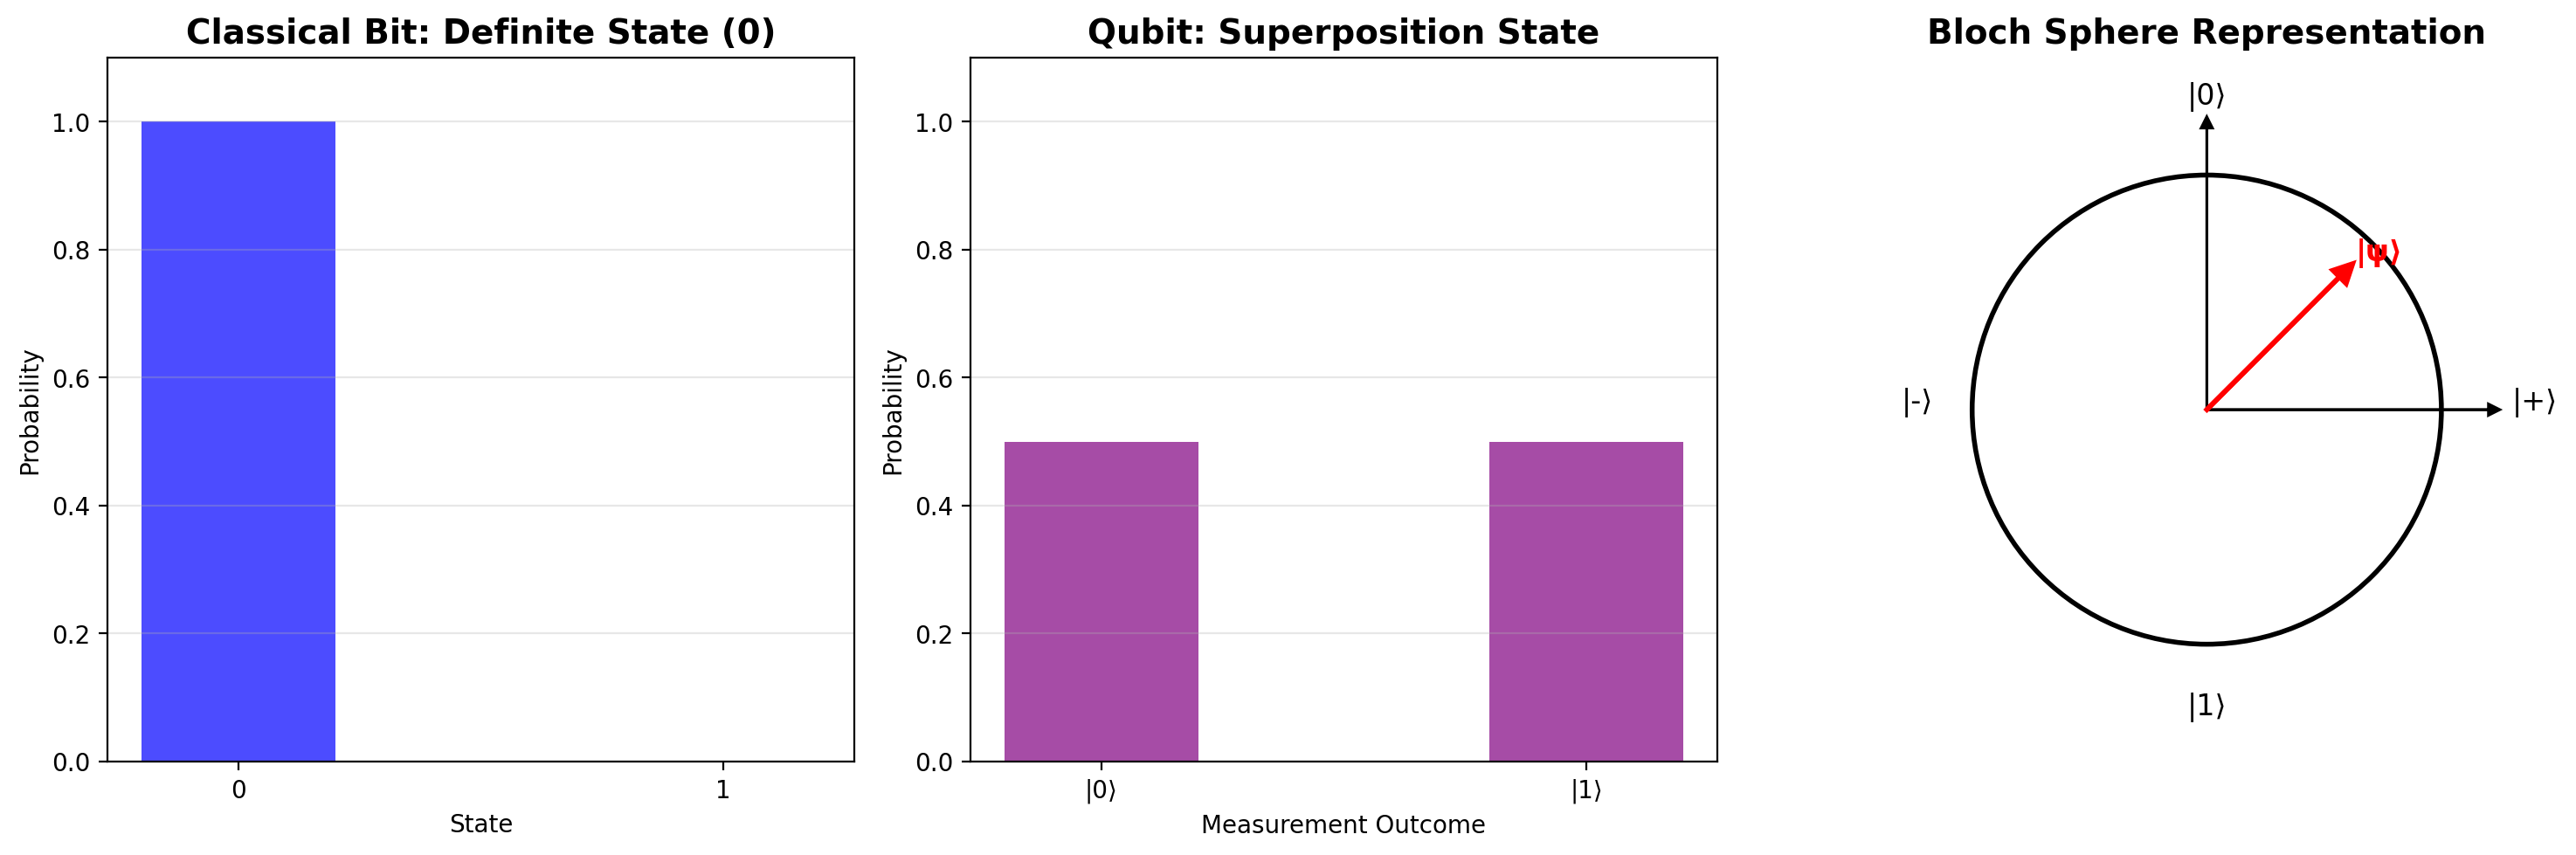

Key Insight: A qubit can exist in a superposition of both states simultaneously!
This allows quantum computers to process multiple possibilities at once.


In [5]:
# Visualize classical bit vs qubit
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Classical bit visualization
bit_states = [0, 1]
bit_probs = [1, 0]  # Definitely 0
axes[0].bar(bit_states, bit_probs, width=0.4, color=['blue', 'gray'], alpha=0.7)
axes[0].set_title('Classical Bit: Definite State (0)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Probability')
axes[0].set_ylim(0, 1.1)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[0].grid(True, alpha=0.3, axis='y')

# Qubit in superposition
qubit_probs = [0.5, 0.5]  # Equal superposition
axes[1].bar(bit_states, qubit_probs, width=0.4, color=['purple', 'purple'], alpha=0.7)
axes[1].set_title('Qubit: Superposition State', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Measurement Outcome')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 1.1)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['|0⟩', '|1⟩'])
axes[1].grid(True, alpha=0.3, axis='y')

# Bloch sphere representation
ax = axes[2]
ax.set_title('Bloch Sphere Representation', fontsize=14, fontweight='bold')
ax.set_aspect('equal')

# Draw sphere
circle = plt.Circle((0, 0), 1, fill=False, edgecolor='black', linewidth=2)
ax.add_patch(circle)

# Draw axes
ax.arrow(0, 0, 0, 1.2, head_width=0.05, head_length=0.05, fc='black', ec='black')
ax.arrow(0, 0, 1.2, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')
ax.text(0, 1.3, '|0⟩', fontsize=12, ha='center')
ax.text(0, -1.3, '|1⟩', fontsize=12, ha='center')
ax.text(1.3, 0, '|+⟩', fontsize=12)
ax.text(-1.3, 0, '|-⟩', fontsize=12)

# Draw qubit state vector
theta = np.pi/4  # 45 degrees - equal superposition
x = np.sin(theta)
y = np.cos(theta)
ax.arrow(0, 0, x*0.8, y*0.8, head_width=0.08, head_length=0.08, 
         fc='red', ec='red', linewidth=2)
ax.text(x*0.9, y*0.9, '|ψ⟩', fontsize=12, color='red', fontweight='bold')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

print("Key Insight: A qubit can exist in a superposition of both states simultaneously!")
print("This allows quantum computers to process multiple possibilities at once.")

## Part 2: Your First Quantum Program

Let's create a quantum circuit that demonstrates superposition - the foundation of quantum computing power.

In [6]:
if QISKIT_AVAILABLE:
    # Create a quantum circuit with 1 qubit
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit for measurement
    
    # Apply Hadamard gate to create superposition
    qc.h(0)  # H gate transforms |0⟩ to (|0⟩ + |1⟩)/√2
    
    # Measure the qubit
    qc.measure(0, 0)
    
    print("Quantum Circuit for Creating Superposition:")
    print(qc.draw())
    print("\nCircuit Explanation:")
    print("1. Start with qubit in |0⟩ state")
    print("2. Apply Hadamard (H) gate to create superposition")
    print("3. Measure the qubit to observe the outcome")
    
    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1000)
    result = job.result()
    counts = result.get_counts()
    
    # Display results
    print("\nMeasurement Results (1000 runs):")
    for outcome, count in sorted(counts.items()):
        probability = count / 1000
        print(f"  Measured |{outcome}⟩: {count} times ({probability:.1%})")
    
    # Visualize results
    fig = plot_histogram(counts)
    fig.suptitle('Quantum Superposition Measurement Results', fontsize=14, fontweight='bold')
    plt.show()
    
    print("\n Success! You created quantum superposition.")
    print("The qubit was in both |0⟩ AND |1⟩ states until measured!")
else:
    print("Conceptual demonstration of quantum superposition:")
    print("\n1. Initialize qubit in |0⟩ state")
    print("2. Apply Hadamard gate: |0⟩ → (|0⟩ + |1⟩)/√2")
    print("3. Measure 1000 times:")
    
    # Simulate superposition results
    measurements = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])
    unique, counts = np.unique(measurements, return_counts=True)
    
    for state, count in zip(unique, counts):
        print(f"  Measured |{state}⟩: {count} times ({count/1000:.1%})")
    
    print("\nIn a real quantum computer, the qubit exists in superposition!")

Conceptual demonstration of quantum superposition:

1. Initialize qubit in |0⟩ state
2. Apply Hadamard gate: |0⟩ → (|0⟩ + |1⟩)/√2
3. Measure 1000 times:
  Measured |0⟩: 503 times (50.3%)
  Measured |1⟩: 497 times (49.7%)

In a real quantum computer, the qubit exists in superposition!


## Part 3: Quantum Entanglement - "Spooky Action at a Distance"

Entanglement is a quantum phenomenon where qubits become correlated - measuring one instantly affects the other, regardless of distance. Einstein famously called this "spooky action at a distance."

### Bell State (Maximally Entangled State)
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

This means the qubits are always measured in the same state!

In [7]:
if QISKIT_AVAILABLE:
    # Create Bell state (entangled qubits)
    qc_bell = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits
    
    # Create entanglement
    qc_bell.h(0)      # Put first qubit in superposition
    qc_bell.cx(0, 1)  # CNOT gate creates entanglement
    
    # Measure both qubits
    qc_bell.measure([0, 1], [0, 1])
    
    print("Quantum Entanglement Circuit:")
    print(qc_bell.draw())
    print("\nCircuit Explanation:")
    print("1. Hadamard gate on qubit 0: creates superposition")
    print("2. CNOT gate: entangles qubit 1 with qubit 0")
    print("3. Measure both qubits")
    
    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc_bell, backend, shots=1000)
    counts = job.result().get_counts()
    
    print("\nEntanglement Measurement Results (1000 runs):")
    for outcome, count in sorted(counts.items()):
        print(f"  Measured |{outcome}⟩: {count} times ({count/10:.1f}%)")
    
    # Visualize entanglement correlations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart of outcomes
    outcomes = list(counts.keys())
    values = list(counts.values())
    colors = ['green' if o in ['00', '11'] else 'red' for o in outcomes]
    
    ax1.bar(outcomes, values, color=colors, alpha=0.7)
    ax1.set_title('Entanglement Measurement Results', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Measurement Outcome')
    ax1.set_ylabel('Count')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Correlation matrix
    correlation_matrix = np.zeros((2, 2))
    for outcome, count in counts.items():
        i, j = int(outcome[0]), int(outcome[1])
        correlation_matrix[i, j] = count
    
    im = ax2.imshow(correlation_matrix, cmap='YlOrRd', aspect='auto')
    ax2.set_title('Qubit Correlation Matrix', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Qubit 1 State')
    ax2.set_ylabel('Qubit 0 State')
    ax2.set_xticks([0, 1])
    ax2.set_yticks([0, 1])
    ax2.set_xticklabels(['|0⟩', '|1⟩'])
    ax2.set_yticklabels(['|0⟩', '|1⟩'])
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax2.text(j, i, f'{int(correlation_matrix[i, j])}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.show()
    
    print("\n Perfect Entanglement Achieved!")
    print("Notice: Only |00⟩ and |11⟩ states appear - qubits are perfectly correlated!")
    print("This correlation persists regardless of the distance between qubits.")
else:
    print("Conceptual demonstration of quantum entanglement:")
    print("\nBell State: |Φ+⟩ = (|00⟩ + |11⟩)/√2")
    print("\nSimulated measurements (1000 runs):")
    
    # Simulate entangled measurements
    entangled_outcomes = np.random.choice(['00', '11'], size=1000)
    unique, counts = np.unique(entangled_outcomes, return_counts=True)
    
    for outcome, count in zip(unique, counts):
        print(f"  Measured |{outcome}⟩: {count} times ({count/10:.1f}%)")
    
    print("\nKey insight: Entangled qubits always measure to matching states!")

Conceptual demonstration of quantum entanglement:

Bell State: |Φ+⟩ = (|00⟩ + |11⟩)/√2

Simulated measurements (1000 runs):
  Measured |00⟩: 501 times (50.1%)
  Measured |11⟩: 499 times (49.9%)

Key insight: Entangled qubits always measure to matching states!


## Part 4: Practical Quantum Algorithms

Now let's implement quantum algorithms that demonstrate real computational advantages.

In [8]:
# Quantum Random Number Generator
def quantum_random_number(n_bits=8):
    """
    Generate a truly random number using quantum mechanics.
    Unlike classical pseudorandom generators, this uses quantum superposition.
    """
    if QISKIT_AVAILABLE:
        qc = QuantumCircuit(n_bits, n_bits)
        
        # Put all qubits in superposition
        for i in range(n_bits):
            qc.h(i)
        
        # Measure all qubits
        qc.measure(range(n_bits), range(n_bits))
        
        # Execute
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1)
        result = job.result()
        counts = result.get_counts()
        
        # Convert binary string to integer
        binary_str = list(counts.keys())[0]
        return int(binary_str, 2)
    else:
        # Simulate quantum randomness
        return np.random.randint(0, 2**n_bits)

# Generate quantum random numbers
print("Quantum Random Number Generator")
print("="*40)
print("Generating 10 random numbers (0-255):")

random_numbers = [quantum_random_number(8) for _ in range(10)]
print(f"Random numbers: {random_numbers}")
print(f"\nMean: {np.mean(random_numbers):.1f}")
print(f"Std Dev: {np.std(random_numbers):.1f}")
print("\n These are truly random, not pseudorandom!")

Quantum Random Number Generator
Generating 10 random numbers (0-255):
Random numbers: [47, 193, 197, 155, 116, 220, 153, 152, 11, 132]

Mean: 137.6
Std Dev: 62.3

 These are truly random, not pseudorandom!


In [9]:
# Demonstrate Quantum Parallelism
def demonstrate_quantum_parallelism():
    """
    Show how quantum computers can evaluate a function on all inputs simultaneously.
    """
    print("Quantum Parallelism Demonstration")
    print("="*40)
    
    if QISKIT_AVAILABLE:
        # Create a 2-qubit circuit
        qc = QuantumCircuit(2)
        
        # Put both qubits in superposition
        qc.h(0)
        qc.h(1)
        
        # This creates the state: (|00⟩ + |01⟩ + |10⟩ + |11⟩)/2
        # All 4 possible inputs are represented simultaneously!
        
        # Get the statevector
        backend = Aer.get_backend('statevector_simulator')
        job = execute(qc, backend)
        state = job.result().get_statevector()
        
        print("Quantum state after creating superposition:")
        print("State = (|00⟩ + |01⟩ + |10⟩ + |11⟩)/2")
        print("\nAll 4 possible 2-bit inputs exist simultaneously!")
        print("\nAmplitudes for each basis state:")
        
        for i, amp in enumerate(state):
            binary = format(i, '02b')
            if abs(amp) > 0.001:  # Only show non-zero amplitudes
                print(f"  |{binary}⟩: {amp:.3f}")
    else:
        print("Classical vs Quantum Function Evaluation:")
        print("\nClassical: Must evaluate f(x) for each input sequentially")
        print("  f(00) → result_1")
        print("  f(01) → result_2")
        print("  f(10) → result_3")
        print("  f(11) → result_4")
        print("  Total: 4 operations")
        print("\nQuantum: Evaluates f(x) on all inputs simultaneously")
        print("  f(|00⟩ + |01⟩ + |10⟩ + |11⟩) → all results at once")
        print("  Total: 1 operation")
    
    print("\nThis parallelism scales exponentially:")
    print("  3 qubits → 8 simultaneous calculations")
    print("  10 qubits → 1,024 simultaneous calculations")
    print("  20 qubits → 1,048,576 simultaneous calculations")
    print("  50 qubits → 1,125,899,906,842,624 simultaneous calculations!")

demonstrate_quantum_parallelism()

Quantum Parallelism Demonstration
Classical vs Quantum Function Evaluation:

Classical: Must evaluate f(x) for each input sequentially
  f(00) → result_1
  f(01) → result_2
  f(10) → result_3
  f(11) → result_4
  Total: 4 operations

Quantum: Evaluates f(x) on all inputs simultaneously
  f(|00⟩ + |01⟩ + |10⟩ + |11⟩) → all results at once
  Total: 1 operation

This parallelism scales exponentially:
  3 qubits → 8 simultaneous calculations
  10 qubits → 1,024 simultaneous calculations
  20 qubits → 1,048,576 simultaneous calculations
  50 qubits → 1,125,899,906,842,624 simultaneous calculations!


## Part 5: Quantum vs Classical Computing Comparison

Let's visualize where quantum computers provide advantages over classical computers.

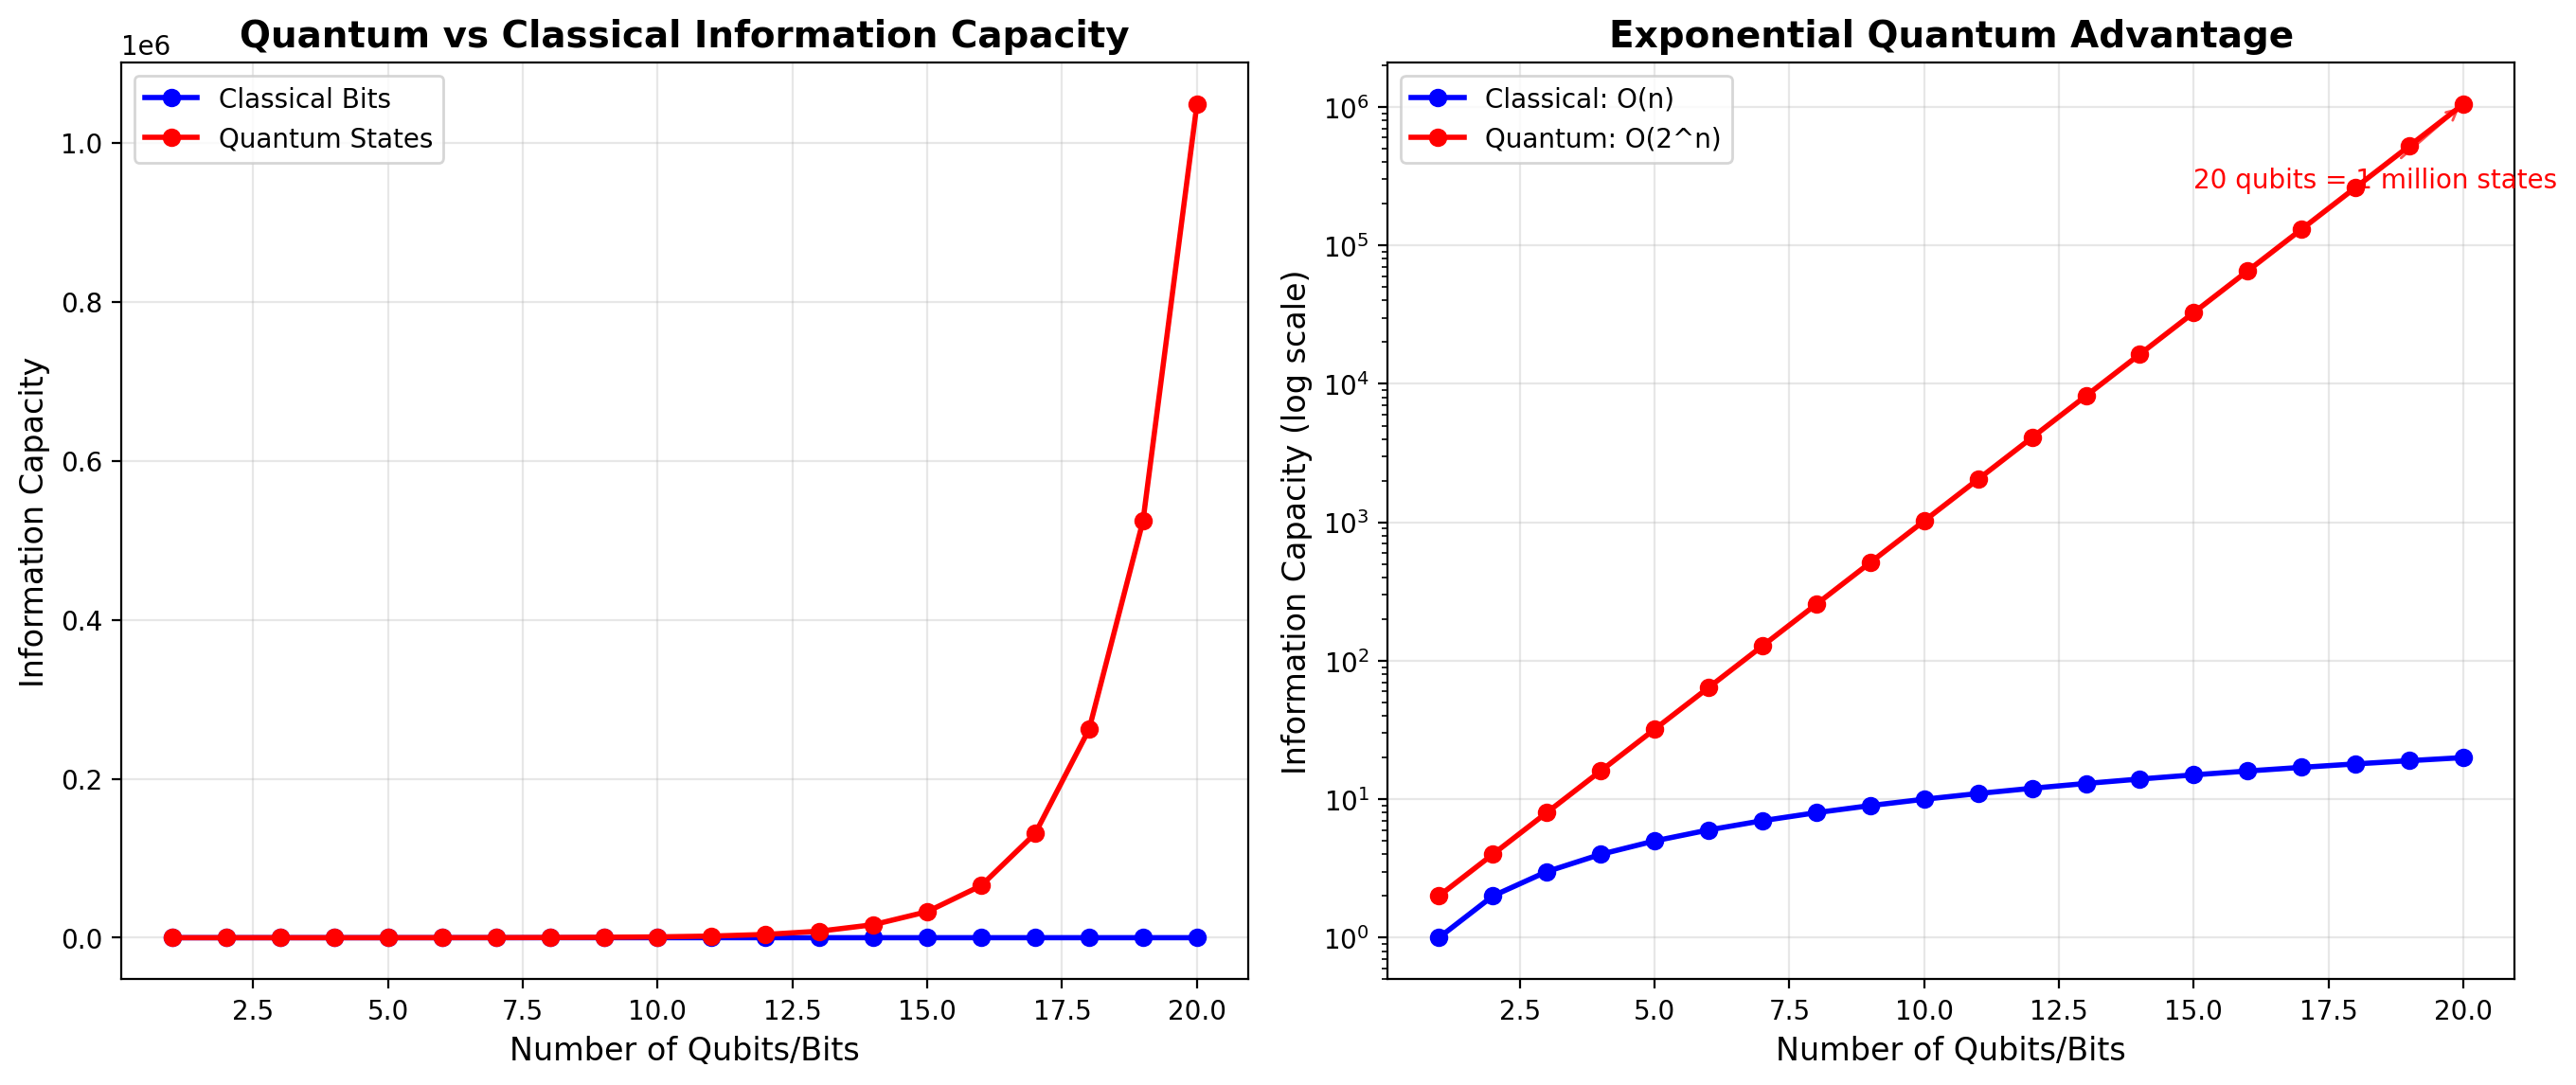

Quantum Computing Advantages:
• 10 qubits can represent 1,024 states simultaneously
• 20 qubits can represent 1,048,576 states simultaneously
• 50 qubits can represent 1,125,899,906,842,624 states simultaneously

This exponential scaling enables quantum supremacy for specific problems!


In [10]:
# Compare quantum vs classical scaling
n_qubits = np.arange(1, 21)
quantum_states = 2 ** n_qubits  # Exponential scaling
classical_bits = n_qubits  # Linear scaling

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear scale comparison
ax1.plot(n_qubits, classical_bits, 'o-', color='blue', linewidth=2, 
         markersize=6, label='Classical Bits')
ax1.plot(n_qubits, quantum_states, 'o-', color='red', linewidth=2, 
         markersize=6, label='Quantum States')
ax1.set_xlabel('Number of Qubits/Bits', fontsize=12)
ax1.set_ylabel('Information Capacity', fontsize=12)
ax1.set_title('Quantum vs Classical Information Capacity', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Log scale for better visualization
ax2.semilogy(n_qubits, classical_bits, 'o-', color='blue', linewidth=2, 
             markersize=6, label='Classical: O(n)')
ax2.semilogy(n_qubits, quantum_states, 'o-', color='red', linewidth=2, 
             markersize=6, label='Quantum: O(2^n)')
ax2.set_xlabel('Number of Qubits/Bits', fontsize=12)
ax2.set_ylabel('Information Capacity (log scale)', fontsize=12)
ax2.set_title('Exponential Quantum Advantage', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Annotate key points
ax2.annotate('20 qubits = 1 million states', 
             xy=(20, 2**20), xytext=(15, 2**18),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Quantum Computing Advantages:")
print(f"• 10 qubits can represent {2**10:,} states simultaneously")
print(f"• 20 qubits can represent {2**20:,} states simultaneously")
print(f"• 50 qubits can represent {2**50:,} states simultaneously")
print("\nThis exponential scaling enables quantum supremacy for specific problems!")

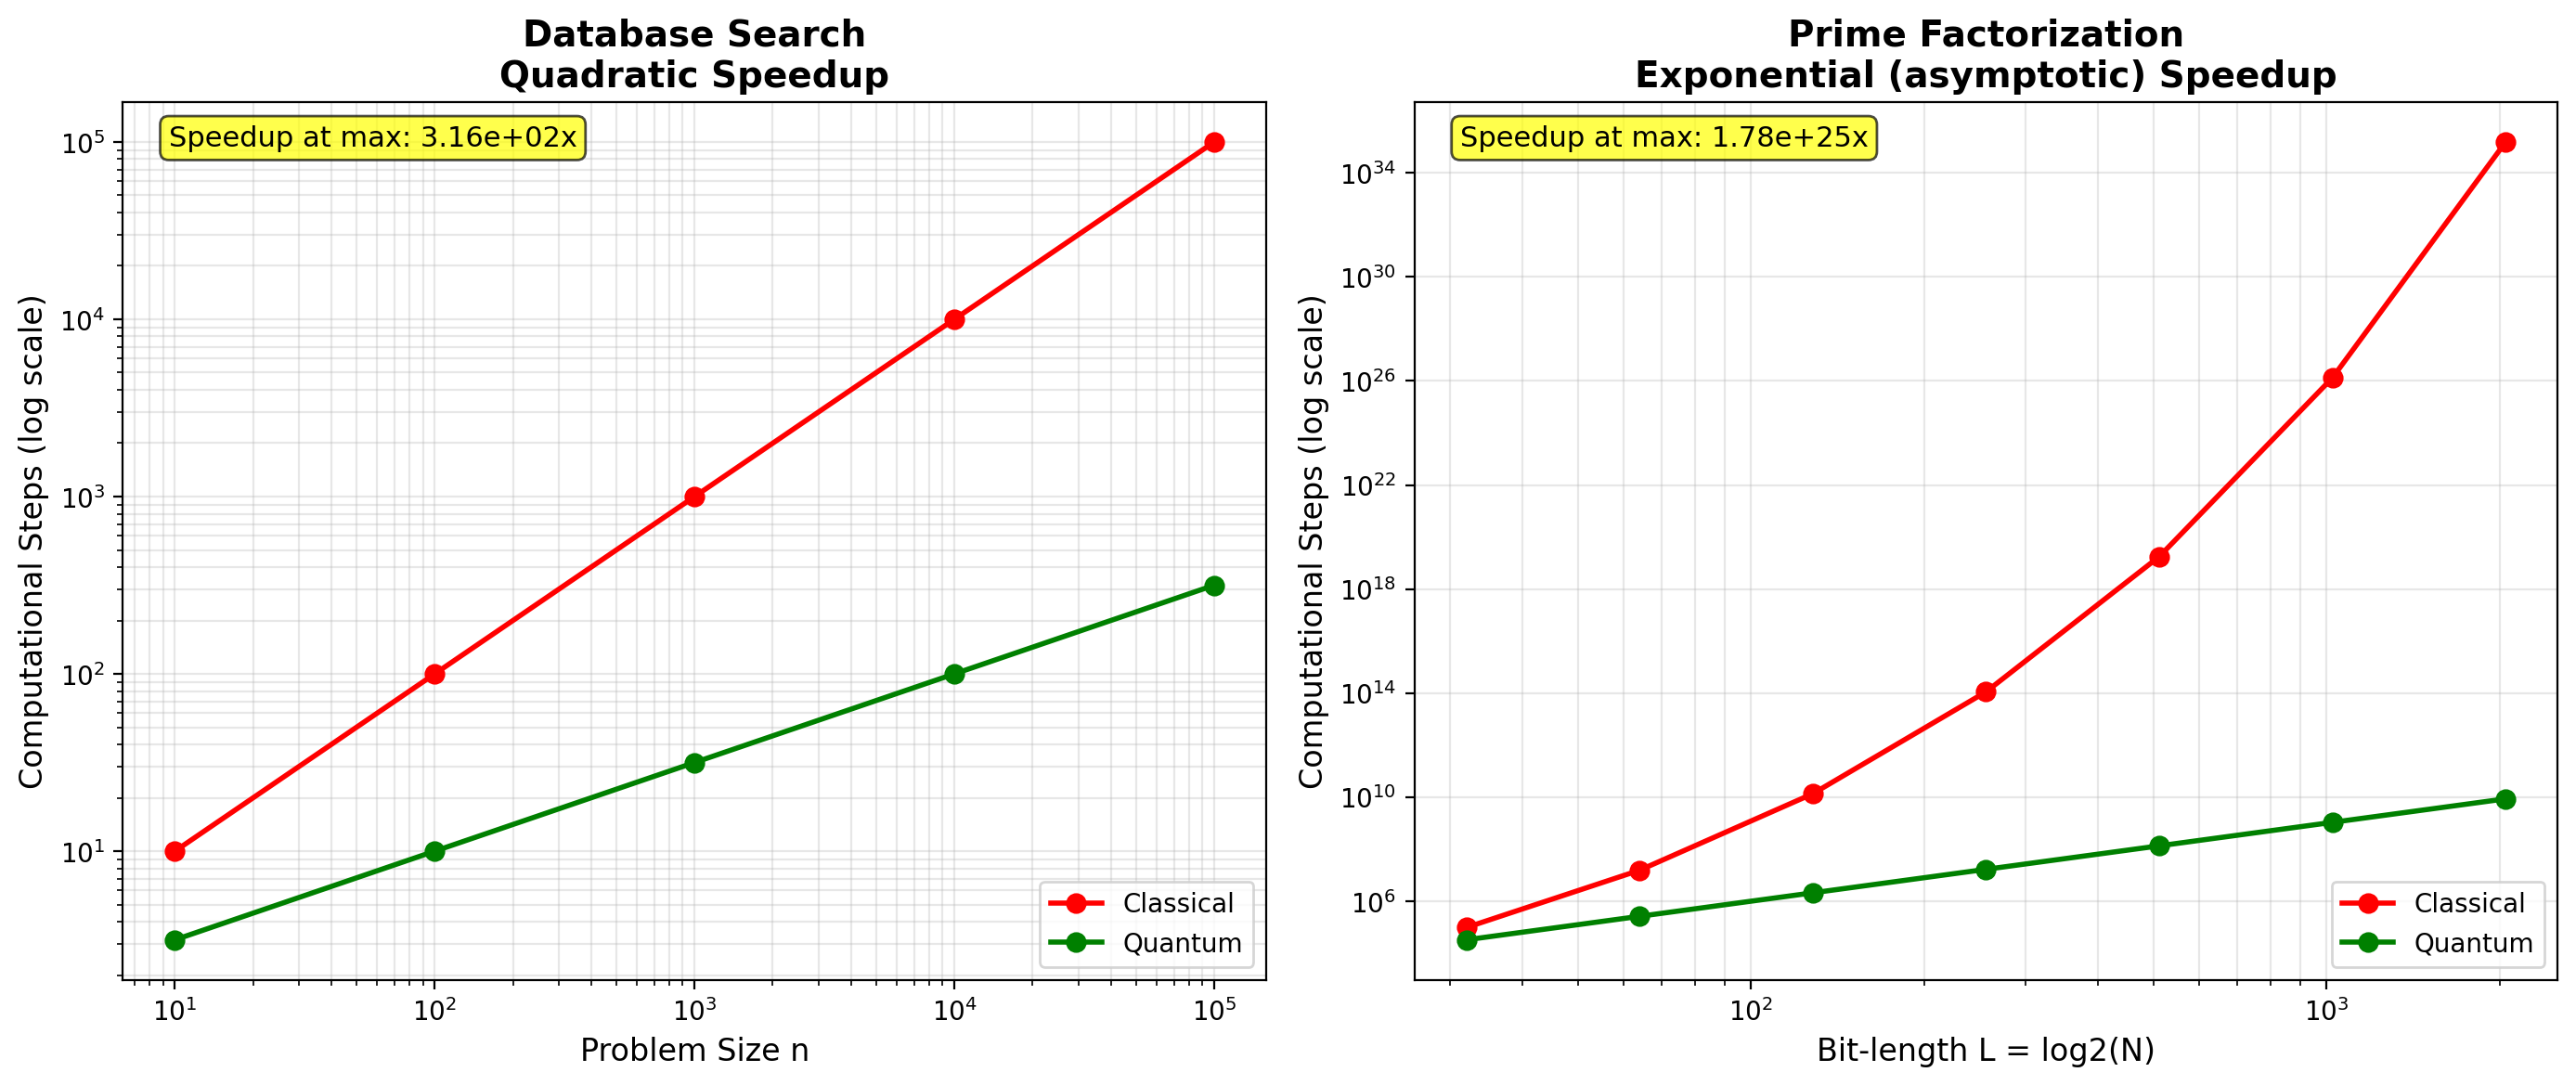

Quantum Algorithm Advantages:

1. Grover's Search Algorithm:
   • Searches unsorted databases quadratically faster
   • Applications: Database queries, optimization problems

2. Shor's Factoring Algorithm:
   • Factors large numbers exponentially faster
   • Impact: Could break RSA encryption

3. Quantum Simulation:
   • Simulates quantum systems directly
   • Applications: Drug discovery, materials science


In [11]:
# Grover (database search) uses problem size n directly
n_search = np.array([10, 100, 1_000, 10_000, 100_000])

# Factoring uses bit-length $L=\log_2 N$
L_bits = np.array([32, 64, 128, 256, 512, 1024, 2048])

# NFS classical complexity: $\exp\!\big(c\,(\ln N)^{1/3}(\ln\ln N)^{2/3}\big)$ with $N=2^L$
c = (64/9)**(1/3)
lnN = L_bits * np.log(2)
classical_fact = np.exp(c * (lnN**(1/3)) * (np.log(lnN)**(2/3)))

# Shor’s complexity $\sim O(L^3)$
quantum_fact = L_bits**3

algorithms = {
    'Database Search': {
        'x': n_search,
        'classical': n_search,                # $O(n)$
        'quantum': np.sqrt(n_search),         # $O(\sqrt{n})$
        'xlabel': 'Problem Size n',
        'advantage': 'Quadratic Speedup'
    },
    'Prime Factorization': {
        'x': L_bits,
        'classical': classical_fact,          # NFS sub-exponential in $L$
        'quantum': quantum_fact,              # $O(L^3)$
        'xlabel': 'Bit-length L = log2(N)',
        'advantage': 'Exponential (asymptotic) Speedup'
    }
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (problem, data) in zip(axes, algorithms.items()):
    x = data['x']
    classical = data['classical']
    quantum = data['quantum']
    
    ax.loglog(x, classical, 'o-', color='red', linewidth=2, markersize=7, label='Classical')
    ax.loglog(x, quantum,   'o-', color='green', linewidth=2, markersize=7, label='Quantum')
    ax.set_xlabel(data['xlabel'], fontsize=12)
    ax.set_ylabel('Computational Steps (log scale)', fontsize=12)
    ax.set_title(f'{problem}\n{data["advantage"]}', fontsize=14, fontweight='bold')
    ax.grid(True, which='both', alpha=0.3)
    ax.legend()
    
    # Speedup = classical/quantum at largest x
    sp = classical[-1] / quantum[-1]
    ax.text(0.04, 0.95, f'Speedup at max: {sp:.2e}x', transform=ax.transAxes,
            fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("Quantum Algorithm Advantages:")
print("\n1. Grover's Search Algorithm:")
print("   • Searches unsorted databases quadratically faster")
print("   • Applications: Database queries, optimization problems")
print("\n2. Shor's Factoring Algorithm:")
print("   • Factors large numbers exponentially faster")
print("   • Impact: Could break RSA encryption")
print("\n3. Quantum Simulation:")
print("   • Simulates quantum systems directly")
print("   • Applications: Drug discovery, materials science")

## Summary and Next Steps

### What You've Learned

**Quantum Fundamentals:**
-  Qubits and superposition
-  Quantum entanglement
-  Quantum measurement and collapse
-  Quantum circuit construction

**Practical Skills:**
-  Building quantum circuits with Qiskit
-  Creating quantum algorithms
-  Understanding quantum advantages
-  Identifying quantum applications

### Key Takeaways

1. **Quantum Superposition** enables parallel computation on exponentially many states
2. **Quantum Entanglement** creates correlations impossible in classical systems
3. **Quantum Algorithms** provide exponential speedups for specific problems
4. **Real Applications** are emerging in drug discovery, cryptography, and optimization


### Resources for Continued Learning

**Online Courses:**
- IBM Qiskit Textbook (free)
- Microsoft Quantum Development Kit
- Google Cirq tutorials

**Books:**
- "Quantum Computing: An Applied Approach" - Hidary
- "Quantum Computation and Quantum Information" - Nielsen & Chuang

**Platforms:**
- IBM Quantum Experience (free cloud quantum computers)
- Amazon Braket (AWS quantum computing)
- Microsoft Azure Quantum


### Final Thoughts

Quantum computing represents one of the most exciting technological frontiers of our time. While still in its early stages, the field offers unprecedented opportunities for those willing to learn and contribute. The concepts you've learned today form the foundation for understanding and participating in the quantum revolution.

Remember: Every quantum expert started exactly where you are now. The key is consistent learning and hands-on practice. The quantum future is being built today - and you can be part of it!